In [3]:
import os
from pathlib import Path
from dotenv import load_dotenv

load_dotenv()
os.chdir(os.getenv("PROJECT_ROOT"))

import numpy as np

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

использованные библиотеки
* aeon
* sktime
* tslearn
* pypots
* pyts
* etna
* kats
* tsfresh

interesting topics: 
* data loading | basic loader classes
* prep techniques
* basic | naive data analysis and pre-labeling, statistics

# Data structures 

## aeon

In [ ]:
data = """@problemName example1
@missing false
@univariate true
@equalLength true
@seriesLength 4
@classLabel true 1 2
@data
2,3,2,4:1
13,12,32,12:1
4,4,5,4:2
"""

with open("data/examples/example1.ts", "w") as f:
    f.writelines(data)

In [ ]:
data = """@problemName example2
@seriesLength 4
@classLabel true 1 2
@data
2,3,2,4:1
13,12,32,12:1
4,4,5,4:2
"""

with open("data/examples/example2.ts", "w") as f:
    f.writelines(data)

In [ ]:
data = """@problemName example3
@missing true
@univariate false
@dimensions 3
@equalLength false
@targetlabel true
@data
2,3,2,4: 5,6,7,7: 8,2,?,5:62
13,?,32,12,25: 6,6,6,6,?,8: 9,8,7,5,5:55
"""

with open("data/examples/example3.ts", "w") as f:
    f.writelines(data)

In [43]:
from aeon.datasets import load_from_ts_file

In [50]:
X, y, metadata = load_from_ts_file('data/examples/example1.ts', return_meta_data=True)

print(f"Данные (X):\n{X}")
print(f"Метки (y):\n{y}")
print(f"Метаданные:\n{metadata}")

Данные (X):
[[[ 2.  3.  2.  4.]]

 [[13. 12. 32. 12.]]

 [[ 4.  4.  5.  4.]]]
Метки (y):
['1' '1' '2']
Метаданные:
{'problemname': 'example1', 'timestamps': False, 'missing': False, 'univariate': True, 'equallength': True, 'classlabel': True, 'targetlabel': False, 'class_values': ['1', '2']}


In [81]:
X, y, metadata = load_from_ts_file('data/examples/example3.ts', return_meta_data=True)

print(f"Данные (X):\n{X}")
print(f"Метки (y):\n{y}")
print(f"Метаданные:\n{metadata}")

Данные (X):
[array([[ 2.,  3.,  2.,  4.,  4.],
       [ 5.,  6.,  7.,  7.,  7.],
       [ 8.,  2., nan,  5.,  5.]]), array([[13., nan, 32., 12., 25.],
       [ 6.,  6.,  6.,  6.,  8.],
       [ 9.,  8.,  7.,  5.,  5.]])]
Метки (y):
[62. 55.]
Метаданные:
{'problemname': 'example3', 'timestamps': False, 'missing': True, 'univariate': False, 'equallength': False, 'classlabel': False, 'targetlabel': True, 'class_values': []}


In [82]:
X_np = np.asarray(X)
X_np.shape

(2, 3, 5)

In [59]:
from aeon.datasets import load_japanese_vowels, load_pickup_gesture_wiimoteZ

j_vowels, j_labels = load_japanese_vowels()
p_vowels, p_labels = load_pickup_gesture_wiimoteZ()

In [60]:
from aeon.transformations.collection.unequal_length import Padder, Truncator

padder = Padder()
truncator = Truncator()
padded_j_vowels = padder.fit_transform(j_vowels)
truncated_j_vowels = truncator.fit_transform(j_vowels)
print(padded_j_vowels.shape, truncated_j_vowels.shape)

(640, 12, 29) (640, 12, 7)


In [64]:
j_vowels[0].shape, j_vowels[1].shape, j_vowels[2].shape, 

((12, 20), (12, 26), (12, 22))

## sktime

In [84]:
from sktime.datasets import load_from_tsfile as load_from_tsfile_sk, write_ndarray_to_tsfile

In [ ]:
# load_from_tsfile_sk('data/examples/example2.ts')

# нужно модифицировать
write_ndarray_to_tsfile(X_np, 'data/examples/sktime_example_rewrite/')

# Data preprocessing

## aeon

In [129]:
from aeon.transformations.series import AutoCorrelationSeriesTransformer
from aeon.datasets import load_airline, load_basic_motions

series = load_airline()
transformer = AutoCorrelationSeriesTransformer(n_lags=10)
acf = transformer.fit_transform(series)
print(acf.shape, series.shape)

(1, 10) (144,)


In [122]:
from aeon.datasets import load_pickup_gesture_wiimoteZ
from aeon.transformations.collection.unequal_length import Truncator

X, y = load_pickup_gesture_wiimoteZ()
print(" Unequal length, first case ", X[0].shape, " tenth case ", X[10].shape)
trunc = Truncator(truncated_length=20)
X2 = trunc.fit_transform(X)
print("Truncated collection shape  =", X2.shape)

 Unequal length, first case  (1, 324)  tenth case  (1, 97)
Truncated collection shape  = (100, 1, 20)


In [123]:
from aeon.classification.feature_based import SummaryClassifier

summary = SummaryClassifier()
try:
    summary.fit(X, y)
except ValueError as e:
    print(e)

summary.fit(X2, y)

Data seen by instance of SummaryClassifier has unequal length series, but SummaryClassifier cannot handle these characteristics. 


SummaryClassifier()

In [128]:
summary

SummaryClassifier()

In [131]:
X, y = load_basic_motions()

X.shape

(80, 6, 100)

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

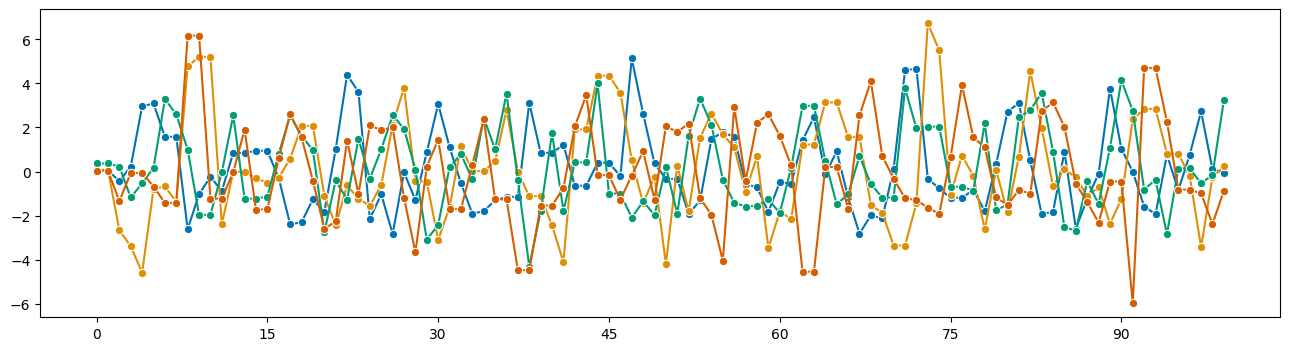

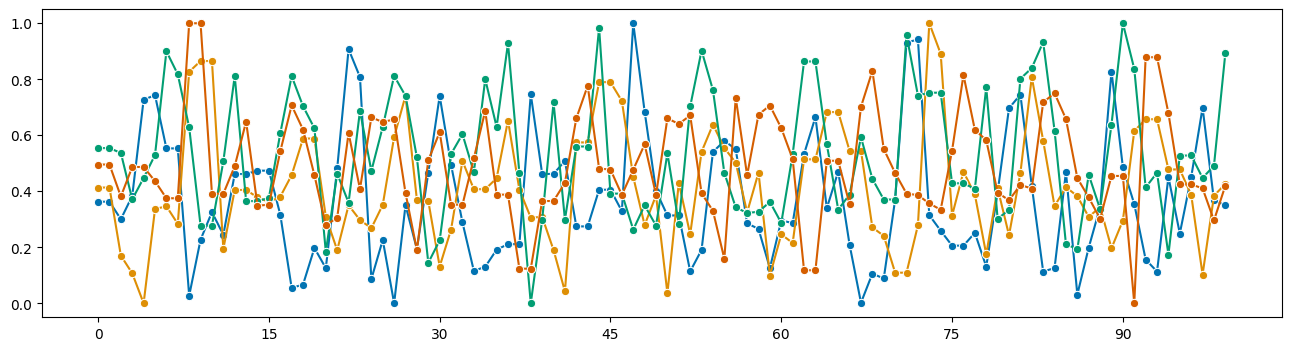

In [147]:
from aeon.transformations.collection import MinMaxScaler

minmax = MinMaxScaler()
X_norm = minmax.fit_transform(X)
plot_series(X[12:16, 3])
plot_series(X_norm[12:16, 3])

# Visuals

## aeon 

In [4]:
from aeon.visualisation import plot_series, plot_series_collection

(3, 200)


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

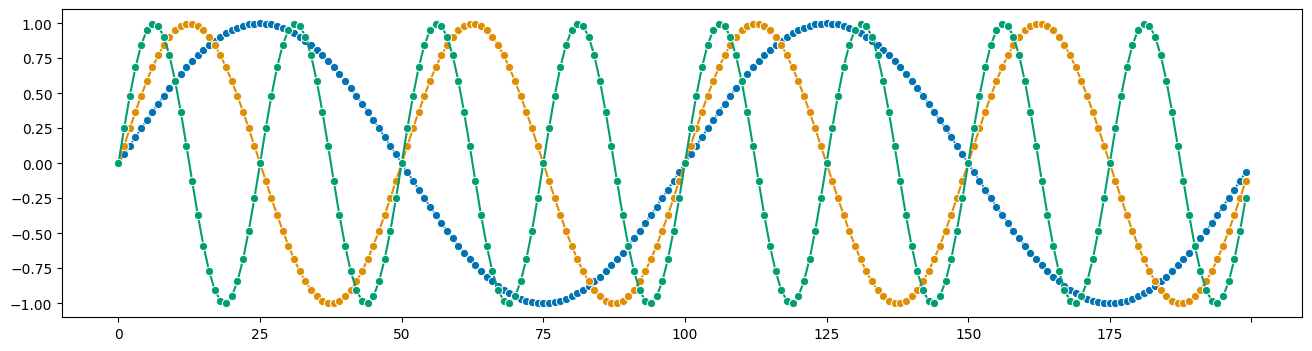

In [5]:
X = np.array(
    [
        np.sin(np.arange(0, np.pi * 4, np.pi * 4 / 200)),
        np.sin(np.arange(0, np.pi * 8, np.pi * 8 / 200)),
        np.sin(np.arange(0, np.pi * 16, np.pi * 16 / 200)),
    ]
)
print(X.shape)
plot_series(X)

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

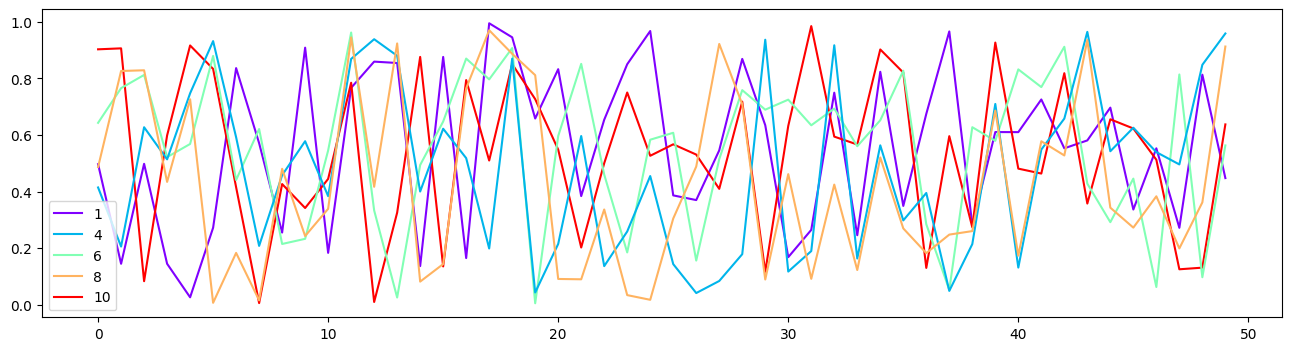

In [22]:
X = np.random.random((5, 2, 50))
y = np.round(np.random.random(5) * 10,0).astype(np.int32) 
plot_series_collection(X, y)

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

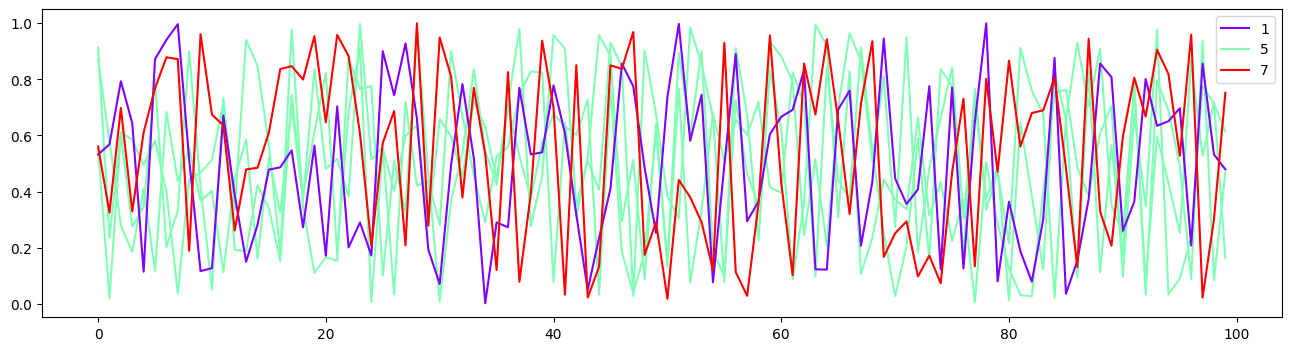

In [20]:
np.random.seed(25)

X = np.random.random((5, 26, 100))
y = np.round(np.random.random(5) * 10,0).astype(np.int32) 
plot_series_collection(X, y)

In [18]:
X.shape, y

((5, 26, 100), array([7, 2, 6, 0, 2], dtype=int32))

## sktime

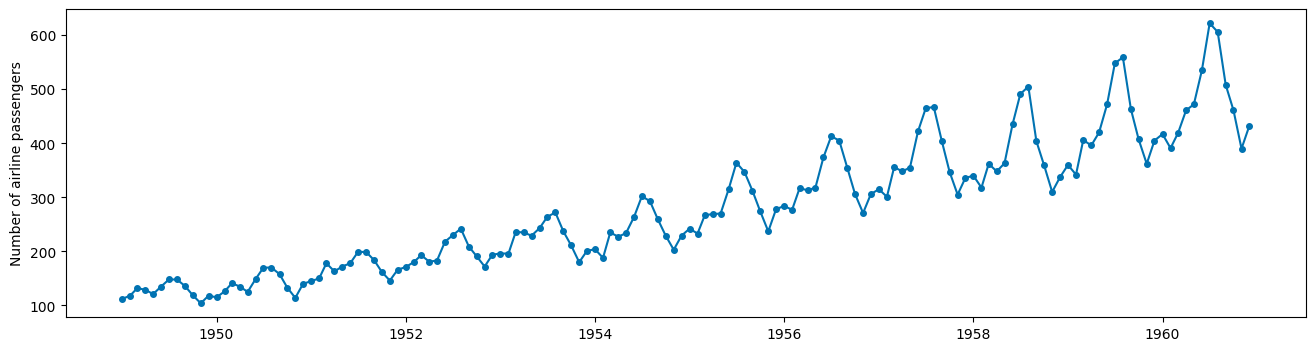

In [87]:
from sktime.utils.plotting import plot_series as plt_sktime
from sktime.datasets import load_airline
y = load_airline()
fig, ax = plt_sktime(y)  

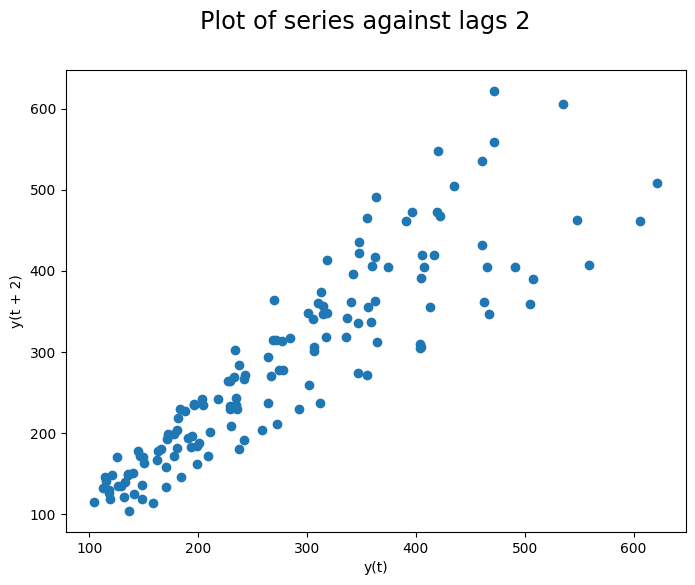

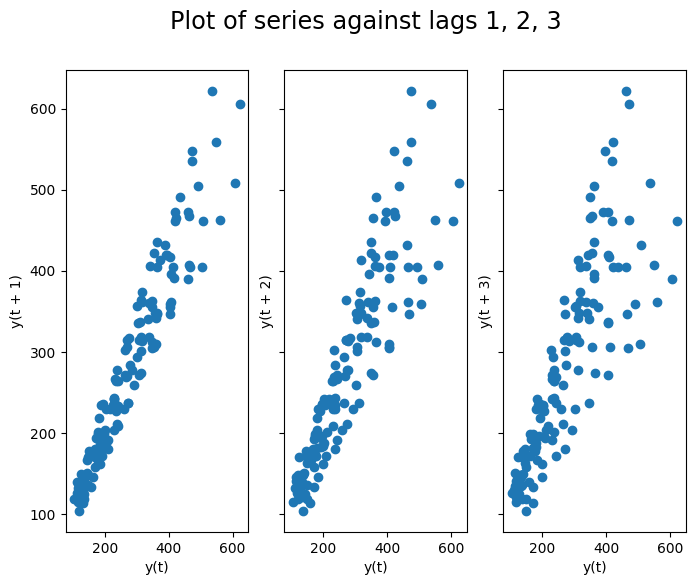

In [92]:
from sktime.utils.plotting import plot_lags
# fig, ax = plot_correlations(y)  
fig, ax = plot_lags(y, lags=2)
fig, ax = plot_lags(y, lags=[1,2,3])

In [93]:
from sktime.split import ExpandingWindowSplitter
from sktime.utils.plotting import plot_windows
from sktime.datasets import load_airline
import numpy as np

(<Figure size 1600x480 with 1 Axes>,
 <Axes: xlabel='Time', ylabel='Window number'>)

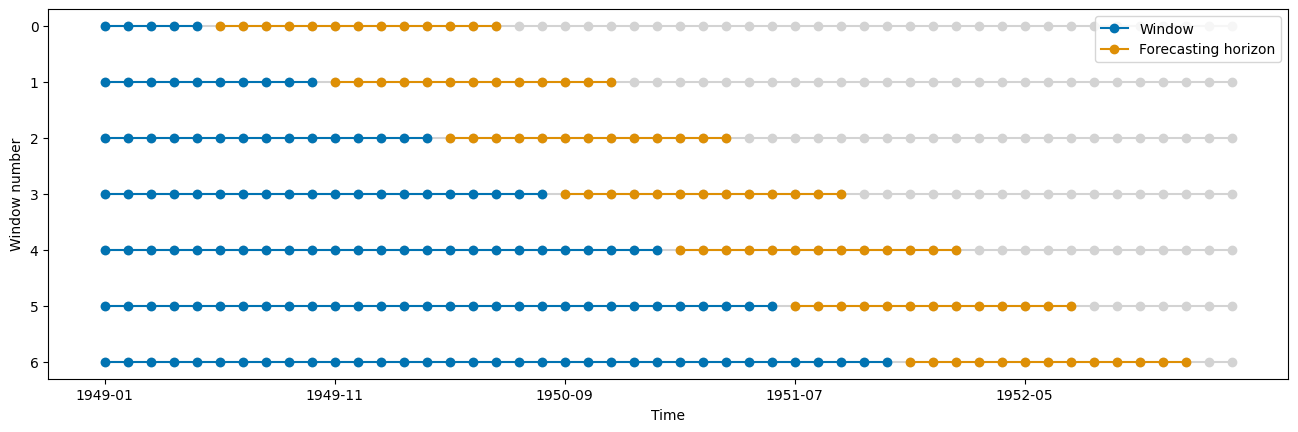

In [ ]:
# шаг для оранжевого
fh = np.arange(1, 14)
# резатель / мешатель (sampler)
# step это через сколько шагов будет информация отображаться на графике. Например, при равном 5 это значит, что каждый 5 результат будет отображен
# initial_window отвечает за начальную длину 
cv = ExpandingWindowSplitter(step_length=5, fh=fh, initial_window=5)
plot_windows(cv, y.iloc[:50])  

# Data

## aeon

In [23]:
# https://www.aeon-toolkit.org/en/stable/examples/datasets/provided_data.html#GunPoint-Segmentation


 Period =  10
 Change points =  [1090 4436 5712 7923]


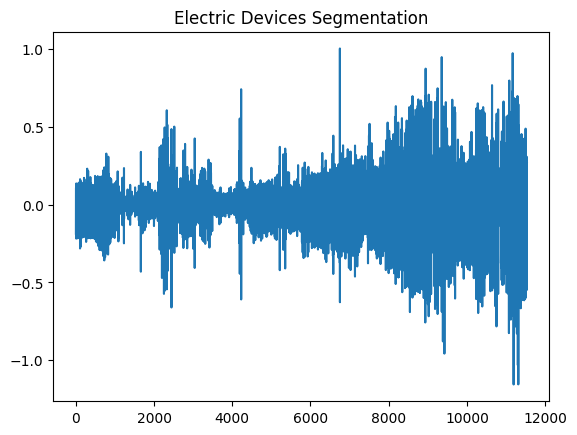

In [26]:
from aeon.datasets import load_electric_devices_segmentation

data, period, change_points = load_electric_devices_segmentation()
print(" Period = ", period)
print(" Change points = ", change_points)
plt.title("Electric Devices Segmentation")
plt.plot(data)

## sktime

In [ ]:
from sktime.datasets.classification.plaid import PLAID
X, y = PLAID().load("X", "y")

In [67]:
X[0]

KeyError: 0

## tslearn

In [ ]:
from tslearn.datasets import UCR_UEA_datasets

uea_ucr = UCR_UEA_datasets()
dict_acc = uea_ucr.baseline_accuracy(
        list_datasets=["Adiac", "ChlorineConcentration"],
        list_methods=["C45"])
print(len(dict_acc))
print(dict_acc["Adiac"])
all_dict_acc = uea_ucr.baseline_accuracy()
print(len(all_dict_acc), all_dict_acc)

2
{'C45': 0.5421994884910486}
85 {'Adiac': {'NB': 0.5626598465473146, 'C45': 0.5421994884910486, 'SVML': 0.4424552429667519, 'SVMQ': 0.7621483375959079, 'BN': 0.5012787723785166, 'RandF': 0.6368286445012787, 'RotF': 0.7749360613810742, 'MLP': 0.7365728900255755, 'Euclidean_1NN': 0.611253197, 'DTW_R1_1NN': 0.603580563, 'DTW_Rn_1NN': 0.608695652, 'DDTW_R1_1NN': 0.585677749, 'DDTW_Rn_1NN': 0.670076726, 'ERP_1NN': 0.608695652, 'LCSS_1NN': 0.250639386, 'MSM_1NN': 0.626598465, 'TWE_1NN': 0.6342711, 'WDDTW_1NN': 0.675191816, 'WDTW_1NN': 0.606138107, 'DD_DTW': 0.7007672634271099, 'DTD_C': 0.700767263, 'DTW_F': 0.611253197, 'ST': 0.782608695652174, 'LS': 0.5217391304347826, 'FS': 0.59335, 'BoP': 0.5882352941176471, 'SAXVSM': 0.45268542199488493, 'BOSS': 0.7647058823529411, 'TSF': 0.731457800511509, 'TSBF': 0.7698209718670077, 'LPS': 0.7698209718670077, 'ACF': 0.6649616368286445, 'PS': 0.7519181585677749, 'EE': 0.6649616368286445, 'COTE': 0.79028133, 'CID_DTW': 0.6240409207161125}, 'ArrowHead': 

/tmp/ipykernel_1329336/177975683.py:4: DeprecationWarning: The method baseline_accuracy will soon be deprecated because the data provider no longer maintains this information.
  dict_acc = uea_ucr.baseline_accuracy(
/tmp/ipykernel_1329336/177975683.py:9: DeprecationWarning: The method baseline_accuracy will soon be deprecated because the data provider no longer maintains this information.
  all_dict_acc = uea_ucr.baseline_accuracy()


## PyPOTS

In [117]:
import benchpots

# есть возможности по маскированию данных / данные нормализуются
# Load PhysioNet2012 all three subsets and apply MCAR with 0.1 rate 
# benchpots.datasets.preprocess_physionet2012(subset="set-a", rate=0.02)

# Trash